<a href="https://colab.research.google.com/github/ZNAXNOR/BlogWebsite/blob/master/Buffer_%26_Overlay_Analysis%E2%80%94for_Park_Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load & Inspect in Python

## Data ingestion and setup

In [ ]:
import geopandas as gpd

# Load parks data
parks = gpd.read_file(
    "/content/mumbai-gardens-parks-playgrounds.kml",
    layer="Mumbai Parks and Playgrounds"
)

# Load city boundary
city = gpd.read_file("/content/MUMBAI.geojson")

print("Parks CRS:", parks.crs, "\nGeometry type:", parks.geom_type.unique())
print("\nCity boundary CRS:", city.crs, "\nGeometry type:", city.geom_type.unique())

# Reproject to projected CRS (e.g. UTM 43N, EPSG:32643) for metrics
parks_m = parks.to_crs(epsg=32643)
city_m = city.to_crs(epsg=32643)

print("\nReprojected CRS:", parks_m.crs)


Parks CRS: EPSG:4326 
Geometry type: ['Point']

City boundary CRS: EPSG:4326 
Geometry type: ['Polygon']

Reprojected CRS: EPSG:32643


## View Data

In [ ]:
parks.head()

,Name,Description,geometry
0,"Veermalji Makaji Bohra Maidan,",,POINT Z (72.82586 18.9661 0)
1,R.G. Plot at 10th lane Kamathipura,,POINT Z (72.82564 18.96627 0)
2,"Tank Square Maidan,",,POINT Z (72.81104 18.97095 0)
3,"Sant Rohidas Udyan,",,POINT Z (72.82789 18.97985 0)
4,"R.G. Plot at 5th Sankhali Street,",,POINT Z (72.82843 18.9733 0)


In [ ]:
city.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,Name,Zone,Part,City,geometry
0,A Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((72.84681 18.94803, 72.84673 18.9476,..."
1,B Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((72.83366 18.94747, 72.83406 18.94778..."
2,C Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((72.81892 18.94946, 72.81935 18.94892..."
3,D Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((72.82319 18.98037, 72.82232 18.97826..."
4,E Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((72.85003 18.98002, 72.84992 18.98005..."


In [ ]:
parks_m.head()

,Name,Description,geometry
0,"Veermalji Makaji Bohra Maidan,",,POINT Z (271081.974 2098489.126 0)
1,R.G. Plot at 10th lane Kamathipura,,POINT Z (271059.025 2098507.568 0)
2,"Tank Square Maidan,",,POINT Z (269527.721 2099044.406 0)
3,"Sant Rohidas Udyan,",,POINT Z (271314.546 2100007.73 0)
4,"R.G. Plot at 5th Sankhali Street,",,POINT Z (271362.277 2099281.799 0)


In [ ]:
city_m.head()

/usr/local/lib/python3.11/dist-packages/geopandas/geoseries.py:860: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,Name,Zone,Part,City,geometry
0,A Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((273264.064 2096460.826, 273255.39 20..."
1,B Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((271878.627 2096415.951, 271920.427 2..."
2,C Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((270328.757 2096654.969, 270373.053 2..."
3,D Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((270820.397 2100072.12, 270725.334 20..."
4,E Ward,Zone 1,Mumbai Suburban,MUMBAI,"POLYGON ((273646.226 2099997.926, 273634.986 2..."


# Buffer Creation and Overlay

## Create 500m buffers

In [ ]:
park_buffers = parks_m.copy()
park_buffers['geometry'] = park_buffers.geometry.buffer(500)
print("Buffer geometries:", park_buffers.geom_type.unique())

Buffer geometries: ['Polygon']


## Overlay Analysis (Difference)

In [ ]:
import geopandas as gpd

candidate_zones = gpd.overlay(city_m, park_buffers, how='difference')
print("Candidate zones CRS:", candidate_zones.crs)
print("Geometry types:", candidate_zones.geom_type.unique())

Candidate zones CRS: EPSG:32643
Geometry types: ['MultiPolygon' 'Polygon']


# Visualizing Results

## Static map using Matplotlib

<Axes: >

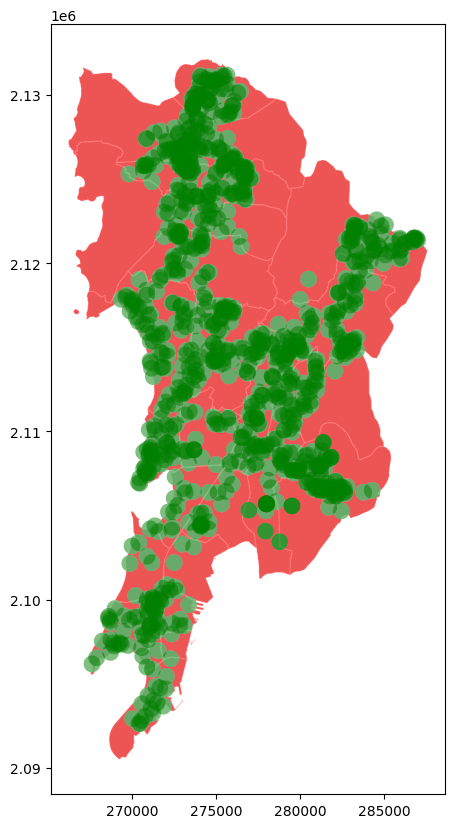

In [ ]:
ax = city_m.plot(color='lightgray', edgecolor='white', figsize=(10, 10))
park_buffers.plot(ax=ax, color='green', alpha=0.5)
candidate_zones.plot(ax=ax, color='red', alpha=0.6)

## Interactive map using Folium

In [ ]:
import folium

# Convert to WGS84 for display
candidate_wgs = candidate_zones.to_crs(epsg=4326)
park_buffers_wgs = park_buffers.to_crs(epsg=4326)

m = folium.Map(location=[19.07, 72.87], zoom_start=12)
folium.GeoJson(park_buffers_wgs, style_function=lambda *_: {'color': 'green', 'fillOpacity': 0.3}).add_to(m)
folium.GeoJson(candidate_wgs, style_function=lambda *_: {'color': 'red', 'fillOpacity': 0.5}).add_to(m)

display(m)

# Ranking Candidate Zones & LLM-Orchestrated Analysis

## Feature Calculation:

In [ ]:
# Calculate area in square meters
candidate_zones['area_sqm'] = candidate_zones.geometry.area

# Example: calculate centroid distance to city center
city_center = city_m.geometry.centroid.iloc[0]
candidate_zones['dist_to_center'] = candidate_zones.geometry.centroid.distance(city_center)

# Please run and report basic statistics:
print(candidate_zones[['area_sqm','dist_to_center']].describe())

           area_sqm  dist_to_center
count  2.400000e+01       24.000000
mean   9.553577e+06    17521.232598
std    1.056484e+07    10480.255436
min    1.956110e+05      866.436919
25%    2.544691e+06     8548.744257
50%    6.102255e+06    16605.545370
75%    1.270330e+07    25977.849379
max    3.592405e+07    36908.461314


## Normalization & Suitability Scoring

In [ ]:
# 1: Min–max normalization
candidate_zones['area_n'] = (
    candidate_zones['area_sqm'] - candidate_zones['area_sqm'].min()
) / (
    candidate_zones['area_sqm'].max() - candidate_zones['area_sqm'].min()
)

candidate_zones['dist_n'] = (
    candidate_zones['dist_to_center'] - candidate_zones['dist_to_center'].min()
) / (
    candidate_zones['dist_to_center'].max() - candidate_zones['dist_to_center'].min()
)

# 2: Define weights (example: 0.6 for area, 0.4 for distance)
w_area, w_dist = 0.6, 0.4

# 3: Compute Weighted Sum Model (simple MCDA) :contentReference[oaicite:7]{index=7}
candidate_zones['score'] = (
    w_area * candidate_zones['area_n'] +
    w_dist * candidate_zones['dist_n']
)

# 4: Rank and view top 5
candidate_zones = candidate_zones.sort_values('score', ascending=False)
print(candidate_zones[['area_n','dist_n','score']].head(5))

      area_n    dist_n     score
15  0.942317  0.930913  0.937756
13  1.000000  0.775752  0.910301
23  0.857992  0.797737  0.833890
14  0.411943  0.699274  0.526876
19  0.556209  0.429699  0.505605


LLM-Orchestrated Summary & Folium Map